### Stochastic Gradient Descent

In [1]:
#importing required libraries

import numpy as np
import pandas as pd

from tabulate import tabulate

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the data

dia = load_diabetes()
print(dia.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [3]:
# Dataset description

print(dia.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

#### Find the features and label

In [4]:
X = dia.data
Y = dia.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

In [5]:
# find the feature names for data set

columns = dia.feature_names
columns

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
dia_df = pd.DataFrame(X)
dia_df.columns = columns
dia_df["MEDV"] = Y

In [7]:
dia_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,MEDV
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### Standardizing the data

In [8]:
#The fit method computes the mean and standard deviation necessary for standardization based on the training data.
#The scaler is then fitted to the training data, and it is ready to transform any data using the parameters learned from the training set.
scaler = StandardScaler().fit(X_train)

In [9]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
train_data = pd.DataFrame(X_train)
train_data['Price'] = y_train
train_data.head(3)

,0,1,2,3,4,5,6,7,8,9,Price
0,0.642054,1.056616,0.619060,1.004864,-0.868439,-0.932813,-1.448515,0.676302,1.275610,-0.000280,208.0
1,1.584921,-0.946417,1.719844,1.292210,0.279081,0.251378,0.339207,-0.084889,0.089488,1.727937,261.0
2,-1.243678,1.056616,-0.279540,0.502008,0.451209,0.814031,-0.826699,0.676302,0.390206,1.123061,179.0


In [11]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [12]:
#Shape of the data
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(309, 10)
(309,)
(133, 10)
(133,)


### Linear Regression : Diabetes prediction

#### Lets calculate R-Squared, Linear Regressor Model accuracy, MSE, RMSE, MAE

In [13]:
#Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("Linear Regression: diabetes Housing Prediction")
# R-Squared value
lin_score = lin_reg.score(X_train, y_train)
print("R-Squared: ", lin_score)

#predicting the target
lin_y_pred = lin_reg.predict(X_test)

# linear Regressor Model Accuracy
lin_acc = explained_variance_score(y_test, lin_y_pred)
lin_acc = round(lin_acc*100, 6)
print("Linear Regressor Model Accuracy:",lin_acc,"%")
print()

#Calculate MAE, MSE & RMSE
lin_MSE = mean_squared_error(y_test, lin_y_pred)
lin_MAE = mean_absolute_error(y_test, lin_y_pred)
lin_RMSE = np.sqrt(lin_MSE)
#lin_RMSE = lin_MSE**(1/2.0)

print("MAE:", lin_MAE)
print("MSE:", lin_MSE)
print("RMSE:", lin_RMSE)
print()

Linear Regression: diabetes Housing Prediction
R-Squared:  0.5244124363545944
Linear Regressor Model Accuracy: 47.98803 %

MAE: 41.91937845679274
MSE: 2821.750981001311
RMSE: 53.120156070942706



##### Graph of Actual vs Predicted

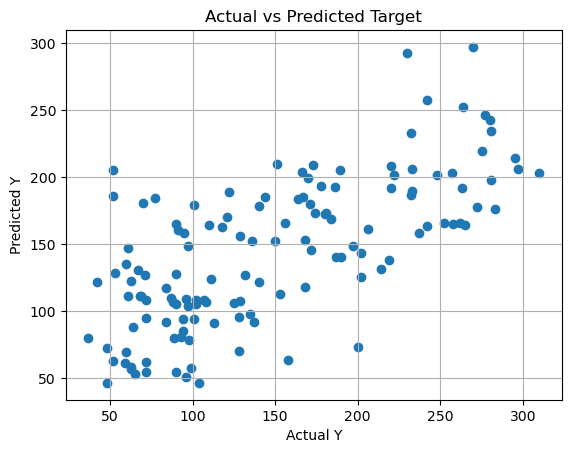

In [14]:
#plt.figure(figsize = (12,4))
plt.scatter(y_test, lin_y_pred)
plt.grid()
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Actual vs Predicted Target")
plt.show()

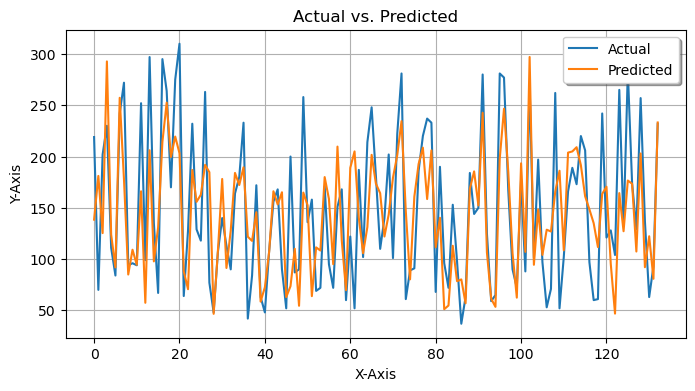

In [15]:
# Graph of Test vs Predicted Data
x_ax = range(len(y_test))
plt.figure(figsize = (8,4))
plt.plot(x_ax, y_test, label = "Actual")
plt.plot(x_ax, lin_y_pred, label = "Predicted")
plt.title("Actual vs. Predicted")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.grid(True)
plt.legend(loc='best',fancybox=True, shadow=True)
plt.show()

### SGD Regression: Diabetes Prediction

In [16]:
print("SGD Regression: Diabetes Prediction")
print()

#Train the model
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train, y_train)

#R-Squared Value
sgd_score = sgd_reg.score(X_train, y_train)
print("R-Squared:",sgd_score)

# Predict the output
sgd_y_pred = sgd_reg.predict(X_test)

#Calculate the accuracy of the model
sgd_acc = explained_variance_score(y_test, sgd_y_pred)
sgd_acc = round(sgd_acc*100, 6)
print("SGD Regressor model accuracy:", sgd_acc,"%")
print()

#Evaluation of the model with MAE, MSE, RMSE
sgd_MAE = mean_absolute_error(y_test, sgd_y_pred)
sgd_MSE = mean_squared_error(y_test, sgd_y_pred)
sgd_RMSE = np.sqrt(sgd_MSE)

print("SGD MAE:", sgd_MAE)
print("SGD MSE:", sgd_MSE)
print("SGD RMSE:", sgd_RMSE)

SGD Regression: Diabetes Prediction

R-Squared: 0.5201902881591525
SGD Regressor model accuracy: 47.862166 %

SGD MAE: 41.96543291029275
SGD MSE: 2832.1478215520756
SGD RMSE: 53.21792763300799


Plot a graph for Actual vs Predicted

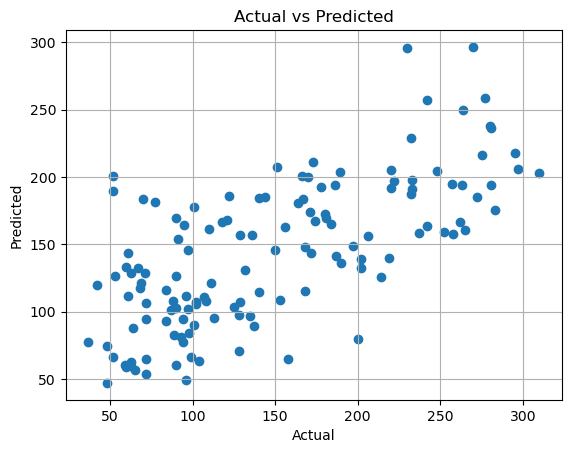

In [17]:
plt.scatter(y_test, sgd_y_pred)
plt.grid()
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

Plot **Test vs Predicted**

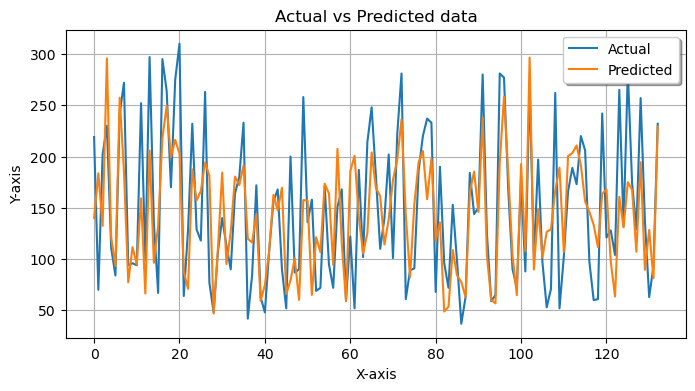

In [18]:
X_ax = range(len(y_test))
plt.figure(figsize = (8,4))
plt.plot(X_ax, y_test, label = "Actual")
plt.plot(X_ax, sgd_y_pred, label = "Predicted")
plt.title("Actual vs Predicted data")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.legend(loc='best', fancybox=True, shadow=True)
plt.show()

### Model Comparison

#### 1. Evaluation Matrics Comparison

In [19]:
# comparision of the matrix between LR model & SGD model

model_table = pd.DataFrame(columns = ["Comparison Matrix", "LR Model", "SGD Model"])
model_table["Comparison Matrix"] = ["Accuracy(Variance Score)", "R2 Score", "MAE", "MSE", "RMSE"]
model_table["LR Model"] = [lin_acc , lin_score , lin_MAE, lin_MSE, lin_RMSE]
model_table["SGD Model"] = [sgd_acc, sgd_score, sgd_MAE, sgd_MSE, sgd_RMSE]

print(tabulate(model_table, headers = "keys", tablefmt = "psql", numalign = "left" ))

+----+--------------------------+------------+-------------+
|    | Comparison Matrix        | LR Model   | SGD Model   |
|----+--------------------------+------------+-------------|
| 0  | Accuracy(Variance Score) | 47.988     | 47.8622     |
| 1  | R2 Score                 | 0.524412   | 0.52019     |
| 2  | MAE                      | 41.9194    | 41.9654     |
| 3  | MSE                      | 2821.75    | 2832.15     |
| 4  | RMSE                     | 53.1202    | 53.2179     |
+----+--------------------------+------------+-------------+


#### 2. Actual vs Prediction Comparison -A: Scatter Plot

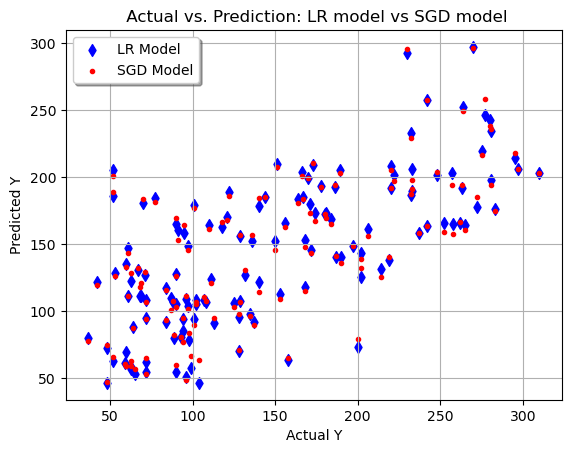

In [20]:
plt.scatter(y_test, lin_y_pred, c='b', marker = 'd', label = "LR Model")
plt.scatter(y_test, sgd_y_pred, c='r', marker = '.', label = "SGD Model")
plt.title(" Actual vs. Prediction: LR model vs SGD model")
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.grid(True)
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.show()

#### 3.Prediction Comparison -B: LR & SGD

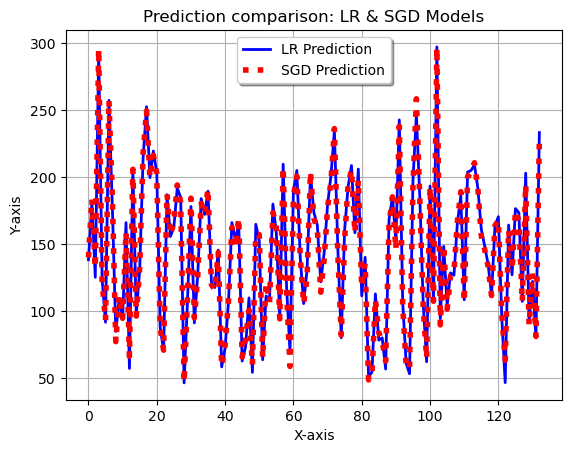

In [21]:
x_axi = range(len(sgd_y_pred))
plt.plot(x_axi, lin_y_pred, c='b', linestyle = "-", linewidth = 2, label = "LR Prediction")
plt.plot(x_axi, sgd_y_pred, c='r', linestyle = ":", linewidth = 4, label = "SGD Prediction")
plt.title("Prediction comparison: LR & SGD Models")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.legend(loc = 'best', fancybox=True, shadow = True)
plt.show()

#### 4.Prediction Comparison -C:Target Prediction Table

Let us compare the **LR predicted value and SGD Predicted value**

In [22]:
prediction_table = pd.DataFrame(columns = ["LR predicted value", "SGD predicted value"])
prediction_table["LR predicted value"] = lin_y_pred
prediction_table["SGD predicted value"] = sgd_y_pred

print(tabulate(prediction_table, headers = "keys", tablefmt = "psql", numalign = "right"))

+-----+----------------------+-----------------------+
|     |   LR predicted value |   SGD predicted value |
|-----+----------------------+-----------------------|
|   0 |               138.47 |               140.126 |
|   1 |              181.101 |               183.642 |
|   2 |              125.344 |               132.401 |
|   3 |               292.76 |               295.699 |
|   4 |              123.883 |               121.378 |
|   5 |              91.8983 |               93.2761 |
|   6 |              257.265 |               257.352 |
|   7 |              177.762 |               185.156 |
|   8 |              84.9855 |                77.396 |
|   9 |               109.16 |               111.632 |
|  10 |              94.4855 |               94.7955 |
|  11 |              166.132 |               159.174 |
|  12 |              57.4074 |               66.4464 |
|  13 |              206.139 |               205.859 |
|  14 |              97.7812 |               96.4284 |
|  15 |   

**-------------------------------------**